# Importing a library that is not in Colaboratory

To import a library that's not in Colaboratory by default, you can use `!pip install` or `!apt-get install`.

In [ ]:
!pip install matplotlib-venn

In [ ]:
!apt-get -qq install -y libfluidsynth1

# Install 7zip reader [libarchive](https://pypi.python.org/pypi/libarchive)

In [ ]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

# Install GraphViz & [PyDot](https://pypi.python.org/pypi/pydot)

In [ ]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

# Install [cartopy](http://scitools.org.uk/cartopy/docs/latest/)

In [ ]:
!pip install cartopy
import cartopy

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing (1).csv


In [ ]:
X=df[['HouseAge']]
y=housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model=LinearRegression()
model.fit(X,y)


y_pred = model.predict(X_test)
print(model.score(X,y))
print("intercept: ",model.intercept_)
print("coefficient: ",model.coef_ )
print("Predictions:", y_pred[:5])

0.011156305266710742
intercept:  1.7911991658938475
coefficient:  [0.0096845]
Predictions: [2.03331158 2.08173406 2.29479298 1.9558356  2.12047204]


In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df.dropna(inplace=True)

X=df.drop(['MedInc'],axis=1)
y=df[['MedInc']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


#encoding
#pd.get_dummies(X_train.oceanproximity)
#pd.get_dummies(X_test.oceanproximity)

model=LinearRegression().fit(X_test,y_test)
y_pred = model.predict(X_test)


print(model.score(X,y))
print("Predictions:", y_pred[30:50])

0.5951127649236672
Predictions: [[3.88267245]
 [3.3064787 ]
 [0.07115194]
 [3.51831846]
 [3.01134774]
 [3.72734099]
 [0.18607842]
 [3.46140726]
 [2.60714465]
 [6.7770317 ]
 [4.20328417]
 [5.53870967]
 [5.08876137]
 [3.85624994]
 [2.38992423]
 [3.23607281]
 [3.19446325]
 [3.77041904]
 [1.61994817]
 [0.46378398]]


In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
X=df[['HouseAge','AveRooms' , 'AveBedrms',  'Population',  'AveOccup' , 'Latitude',  'Longitude']]
y=df[['MedInc']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model=LinearRegression().fit(X_test,y_test)
y_pred = model.predict(X_test)

print("Predictions:", y_pred[30:50])
print(model.score(X_train,y_train))
print("intercept: ",model.intercept_)
print("coefficient: ",model.coef_ )

Predictions: [[2.45762706]
 [4.31665242]
 [2.9576827 ]
 [5.72897101]
 [4.21943632]
 [5.51659822]
 [3.77069611]
 [3.90993458]
 [3.37511237]
 [2.71806449]
 [6.46431013]
 [3.5675364 ]
 [2.18415534]
 [2.77628093]
 [4.01710289]
 [3.2191209 ]
 [4.40124414]
 [4.48716804]
 [3.20426978]
 [4.16941109]]
0.45349393343756594
intercept:  [-57.75112857]
coefficient:  [[-7.66457420e-03  1.05744590e+00 -4.22621338e+00  1.46205067e-05
  -5.43132167e-02 -7.76435793e-01 -7.40408308e-01]]


In [ ]:
#feature selection with lasso and ridge
#diabetes dataset

from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
X=df
y=diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

#ridge
model=Ridge().fit(X_test_sc,y_test)
y_pred_ridge = model.predict(X_test_sc)


#evaluate
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print(model.score(X_train_sc,y_train))
print("intercept: ",model.intercept_)
print("coefficient: ",model.coef_ )
print(y_pred_ridge[:5])


#lasso
model1=Lasso(alpha=0.2).fit(X_test_sc,y_test)
y_pred_lasso = model1.predict(X_test_sc)

# Evaluate Lasso regression
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print(lasso_r2)
print(y_pred_lasso[:5])
print(model1.score(X_train_sc,y_train))
print("intercept: ",model1.intercept_)
print("coefficient: ",model1.coef_ )

0.47798363672065425
intercept:  156.28487546350053
coefficient:  [ -6.13499074 -12.08620228  20.1092497   10.87629767   7.38778232
  -4.28500254 -14.80848276  -6.5727975   31.18080034   7.90182693]
[170.88134164 158.43840296 174.85648266 276.96177796 124.11069313]
0.5149383470328187
[169.99426907 157.98320808 174.30893358 277.27760251 124.68762736]
0.480776904508617
intercept:  156.25540123015315
coefficient:  [ -5.95882787 -11.89514285  20.39519707  10.64828308   0.99126812
   0.         -11.05780714  -4.47414695  33.40136877   7.56694961]


In [ ]:
# Feature names
features = X.columns

# Create a DataFrame to compare coefficients
coef_comparison = pd.DataFrame({
    'Feature': features,
    'Ridge Coefficients': model.coef_,
    'Lasso Coefficients': model1.coef_
})

print("\nCoefficient Comparison:")
print(coef_comparison)



Coefficient Comparison:
  Feature  Ridge Coefficients  Lasso Coefficients
0     age           -6.247706           -6.113989
1     sex          -12.295248          -12.328677
2     bmi           20.099416           20.225578
3      bp           10.931026           10.889681
4      s1           14.057045            2.253150
5      s2           -9.350220           -0.000000
6      s3          -18.360570          -12.795228
7      s4           -8.427645           -6.494952
8      s5           29.620121           33.302425
9      s6            8.000465            7.866533


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

X,y= make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty':["l1","l2"],
    'solver':["liblinear",'saga']
    }
model=LogisticRegression(max_iter=1000)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
Best Score: 0.867


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names= ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df=pd.read_csv(url,names=column_names, na_values="?")
df.dropna(inplace=True)
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
#convert to numeric
df["thal"] = pd.to_numeric(df["thal"], errors="coerce")
df["ca"] = pd.to_numeric(df["ca"], errors="coerce")

#fill missing values using median
df.fillna(df.median(), inplace=True)

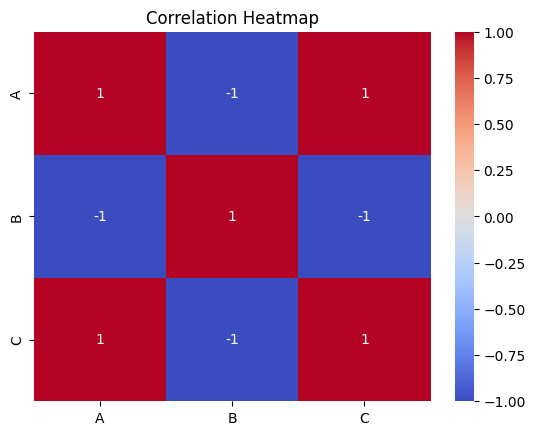

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [5, 4, 3, 2, 1],
    'C': [2, 3, 4, 5, 6]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate the correlation matrix
correlation = df.corr()

# Plot the heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
#remove low variance features
X=df.drop(columns=["target"])
y=df["target"]

#variance threshhold
var_thresh= VarianceThreshold(threshold=0.1)
X_var_selected=var_thresh.fit_transform(X)

selected_features_var = X.columns[var_thresh.get_support()]
print("Selected features after variance threshhold: ", selected_features_var)

Selected features after variance threshhold:  Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


In [ ]:
#remove highly correlated features
corr_matrix= df.corr().abd()

upper= corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
to_drop= [column for column in upper.columns if any(upper[column]>0.95)]
print("Columns to drop: ", to_drop)

AttributeError: 'DataFrame' object has no attribute 'abd'

In [ ]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Load dataset
diabetes = load_diabetes()

# Convert into a DataFrame
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target)

# Discretize the target variable into categories
# For example: Low, Medium, High based on percentiles
y = pd.cut(y, bins=[-np.inf, 100, 200, np.inf], labels=[0, 1, 2])

# Check for and fill null values (if any)
#print(X.isnull().sum())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# Define classifiers
lr = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier(max_depth=3, random_state=42)

# Hard voting
vc_hard = VotingClassifier(estimators=[('lr', lr), ('knn', knn), ('dt', dt)], voting='hard')
vc_hard.fit(X_train_sc, y_train)

y_pred_hard = vc_hard.predict(X_test_sc)

print("Hard Voting Accuracy\n", accuracy_score(y_test, y_pred_hard))
print("Hard Voting Classification Report\n", classification_report(y_test, y_pred_hard))

# Soft voting
vc_soft = VotingClassifier(estimators=[('lr', lr), ('knn', knn), ('dt', dt)], voting='soft')
vc_soft.fit(X_train_sc, y_train)

y_pred_soft = vc_soft.predict(X_test_sc)

print("Soft Voting Accuracy\n", accuracy_score(y_test, y_pred_soft))
print("Soft Voting Classification Report\n", classification_report(y_test, y_pred_soft))


#bagging
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
model.fit(X_train_sc, y_train)


from sklearn.metrics import accuracy_score, classification_report

y_pred=model.predict(X_test_sc)

print("Accuracy\n",accuracy_score(y_test, y_pred))
print("Classification Score\n", classification_report(y_test, y_pred))

Hard Voting Accuracy
 0.5617977528089888
Hard Voting Classification Report
               precision    recall  f1-score   support

           0       0.65      0.71      0.68        34
           1       0.43      0.47      0.45        32
           2       0.65      0.48      0.55        23

    accuracy                           0.56        89
   macro avg       0.57      0.55      0.56        89
weighted avg       0.57      0.56      0.56        89

Soft Voting Accuracy
 0.5842696629213483
Soft Voting Classification Report
               precision    recall  f1-score   support

           0       0.70      0.68      0.69        34
           1       0.45      0.56      0.50        32
           2       0.69      0.48      0.56        23

    accuracy                           0.58        89
   macro avg       0.61      0.57      0.58        89
weighted avg       0.61      0.58      0.59        89

Accuracy
 0.5617977528089888
Classification Score
               precision    recall  